# Knowledge and Data 2024
## Maggie C., Holly M., Kayra Ö., M. Fatih A.

In [8]:
from rdflib import Graph, Namespace
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
from math import pi

In [ ]:
anx_graph = Graph()
file_name = 'FinalOntology.ttl'

with open(file_name, 'r') as f:
    anx_graph.parse(f, format='turtle')

### Queries & Visualisations

In [9]:
'''
Query1 retrieves the count of male and female patients from the 'testing' dataset,
categorized by the age group. 
'''

query1 = """
PREFIX anx: <http://AnxietyDisordersandRiskFactors.com#>

SELECT ?age 
       (COUNT(?malePatient) AS ?maleCount) 
       (COUNT(?femalePatient) AS ?femaleCount) 
       (COUNT(?malePatient) + COUNT(?femalePatient) AS ?total)
WHERE {
  { 
    ?malePatient anx:hasAge ?age .
    ?malePatient a anx:Male .
  }
  UNION
  {
    ?femalePatient anx:hasAge ?age .
    ?femalePatient a anx:Female .
  }
}
GROUP BY ?age
ORDER BY ?age
"""

results = anx_graph.query(query1)

for row in results:
    print(f"Age Group: {row.age}, Male Count: {row.maleCount}, Female Count: {row.femaleCount}, Total: {row.total}")

Age Group: 2, Male Count: 53, Female Count: 41, Total: 94
Age Group: 3, Male Count: 43, Female Count: 30, Total: 73
Age Group: 4, Male Count: 36, Female Count: 38, Total: 74
Age Group: 5, Male Count: 32, Female Count: 29, Total: 61
Age Group: 6, Male Count: 2, Female Count: 3, Total: 5


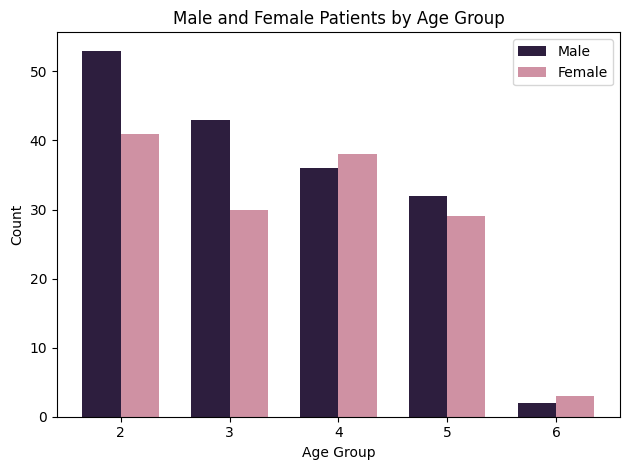

In [10]:
age_groups = []
male = []
female = []
totals = []


for row in results:
    age_groups.append(int(row.age))
    male.append(int(row.maleCount))
    female.append(int(row.femaleCount))
    totals.append(int(row.total))


bar_width = 0.35
index = np.arange(len(age_groups))
colours = sns.cubehelix_palette(8)

plt.bar(index, male, bar_width, label='Male', color=colours[7])
plt.bar(index + bar_width, female, bar_width, label='Female', color=colours[2])

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Male and Female Patients by Age Group')
plt.xticks(index + bar_width / 2, age_groups)
plt.legend()

plt.tight_layout()
plt.savefig('query1.png')
plt.show()


In [11]:
"""
Query2 counts the number of patients for each risk factor from the 'training' and the 'testing' datasets,
ordered by the number of patients.
"""

query2 = """
PREFIX anx: <http://AnxietyDisordersandRiskFactors.com#>

SELECT (STRAFTER(STR(?riskFactor), "#") AS ?riskFactorName) (COUNT(?patient) AS ?patientCount)
WHERE {
  ?patient anx:hasRiskFactor ?riskFactor .
}
GROUP BY ?riskFactor
ORDER BY DESC(?patientCount)
"""

results = anx_graph.query(query2)

for row in results:
    print(f"Risk Factor: {row.riskFactorName}, Patient Count: {row.patientCount}")

#'SAD_%28Seasonal_Anxiety_Disorder%29' means Social Anxiety Disorder.

Risk Factor: SAD_%28Seasonal_Anxiety_Disorder%29, Patient Count: 276
Risk Factor: GAD_%28Generalized_Anxiety_Disorder%29, Patient Count: 272
Risk Factor: loss_of_parents, Patient Count: 155
Risk Factor: family_psychiatric_diagnosis, Patient Count: 102
Risk Factor: family_substance_abuse, Patient Count: 72
Risk Factor: ODD, Patient Count: 34
Risk Factor: ADHD, Patient Count: 22
Risk Factor: Depression, Patient Count: 17


C:\Users\silen\AppData\Local\Temp\ipykernel_13344\2764655227.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patients, y=risk_factors, palette='cubehelix')


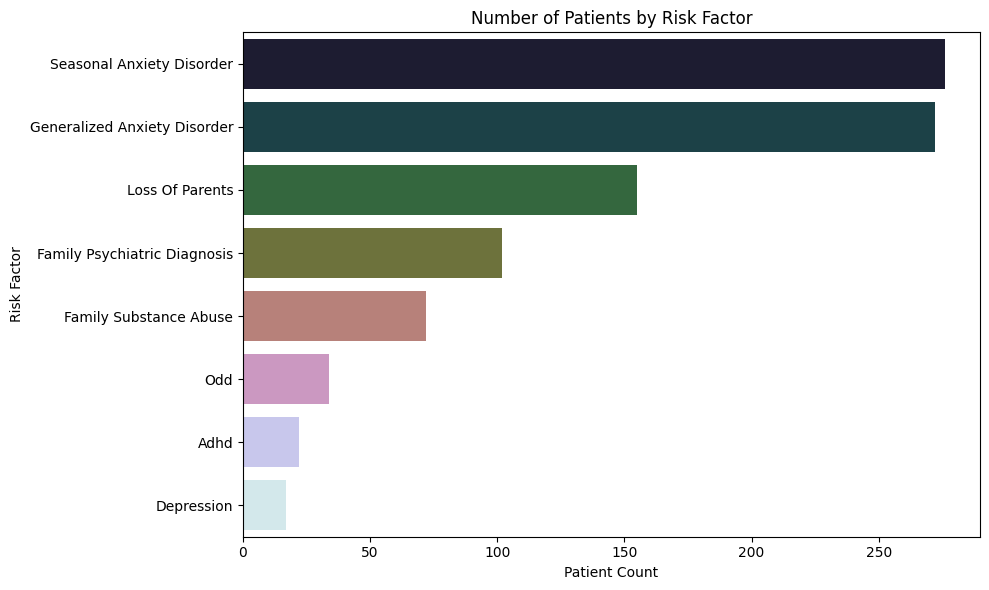

In [12]:
risk_factors = []
patients = []

for row in results:
    risk_factor = str(row.riskFactorName)
    
    if risk_factor == 'SAD_%28Seasonal_Anxiety_Disorder%29':
        risk_factor = 'Seasonal Anxiety Disorder'
    elif risk_factor == 'GAD_%28Generalized_Anxiety_Disorder%29':
        risk_factor = 'Generalized Anxiety Disorder'
    else:
        risk_factor = risk_factor.replace('_', ' ').title()
    
    risk_factors.append(risk_factor)
    patients.append(int(row.patientCount))

plt.figure(figsize=(10, 6))
sns.barplot(x=patients, y=risk_factors, palette='cubehelix')
plt.xlabel('Patient Count')
plt.ylabel('Risk Factor')
plt.title('Number of Patients by Risk Factor')
plt.tight_layout()
plt.savefig('query2.png')
plt.show()

In [13]:
"""
Query3 calculates the average age of patients with varying numbers 
of sleep disturbances from the 'test' dataset who are not in poverty.
"""

query3 = """
PREFIX anx: <http://AnxietyDisordersandRiskFactors.com#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?numOfDisturbances (ROUND(AVG(?age) * 100) / 100 AS ?avgAge)
WHERE {
  ?patient anx:has_sleep_disturbances ?numOfDisturbances;
           anx:hasAge ?age;
           anx:isInPoverty "false"^^xsd:boolean.
}
GROUP BY ?numOfDisturbances
ORDER BY ?numOfDisturbances
"""

results = anx_graph.query(query3)

for row in results:
    print(f"Number of sleep disturbances: {row.numOfDisturbances}, Average age: {row.avgAge}")

Number of sleep disturbances: 1, Average age: 3.68
Number of sleep disturbances: 2, Average age: 3.26
Number of sleep disturbances: 3, Average age: 3.23
Number of sleep disturbances: 4, Average age: 3.49
Number of sleep disturbances: 5, Average age: 3.39
Number of sleep disturbances: 6, Average age: 2.86
Number of sleep disturbances: 7, Average age: 2.78
Number of sleep disturbances: 8, Average age: 4
Number of sleep disturbances: 9, Average age: 3.5
Number of sleep disturbances: 10, Average age: 5


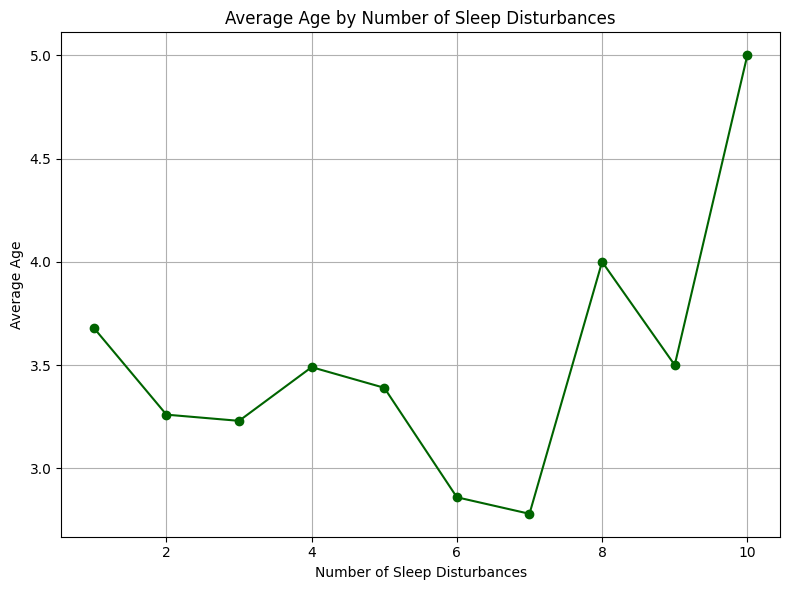

In [14]:
num_of_disturbances = []
avg_ages = []

for row in results:
    num_of_disturbances.append(int(row.numOfDisturbances))
    avg_ages.append(float(row.avgAge))

colours = sns.cubehelix_palette(8)

plt.figure(figsize=(8, 6))
plt.plot(num_of_disturbances, avg_ages, marker='o', linestyle='-', color="darkgreen")
plt.xlabel('Number of Sleep Disturbances')
plt.ylabel('Average Age')
plt.title('Average Age by Number of Sleep Disturbances')
plt.grid(True)
plt.tight_layout()
plt.savefig('query3.png')
plt.show()

In [15]:
'''
Query4 computes the average hours to fall asleep and sleep resistance levels for 
patients from 'train' dataset, categorized by Social and Generalized Anxiety Disorder. 
'''

query4 = """
PREFIX anx: <http://AnxietyDisordersandRiskFactors.com#>

SELECT (STRAFTER(STR(?riskFactor), "#") AS ?riskFactorName)
       (ROUND(AVG(?hoursToFallAsleep) * 100) / 100 AS ?avgHoursToFallAsleep) 
       (ROUND(AVG(?sleepResistance) * 100) / 100 AS ?avgSleepResistance) 
WHERE {
    ?patient anx:has_hours_to_fall_asleep ?hoursToFallAsleep ;
             anx:has_sleep_resistance ?sleepResistance ;
             anx:hasRiskFactor ?riskFactor .
}
GROUP BY ?riskFactor
"""

results = anx_graph.query(query4)

for row in results:
    print(f"Risk Factor: {row.riskFactorName}, Avg Hours to Fall Asleep: {row.avgHoursToFallAsleep}, Avg Sleep Resistance: {row.avgSleepResistance}")
    
#again ignore the first column.

Risk Factor: GAD_%28Generalized_Anxiety_Disorder%29, Avg Hours to Fall Asleep: 0.25, Avg Sleep Resistance: 29.21
Risk Factor: SAD_%28Seasonal_Anxiety_Disorder%29, Avg Hours to Fall Asleep: 0.34, Avg Sleep Resistance: 33.03


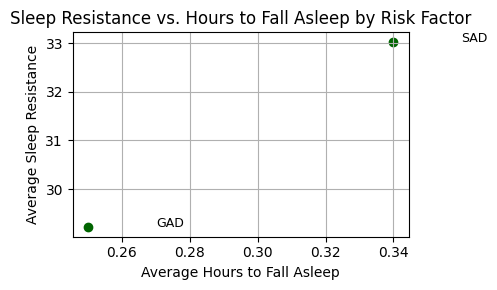

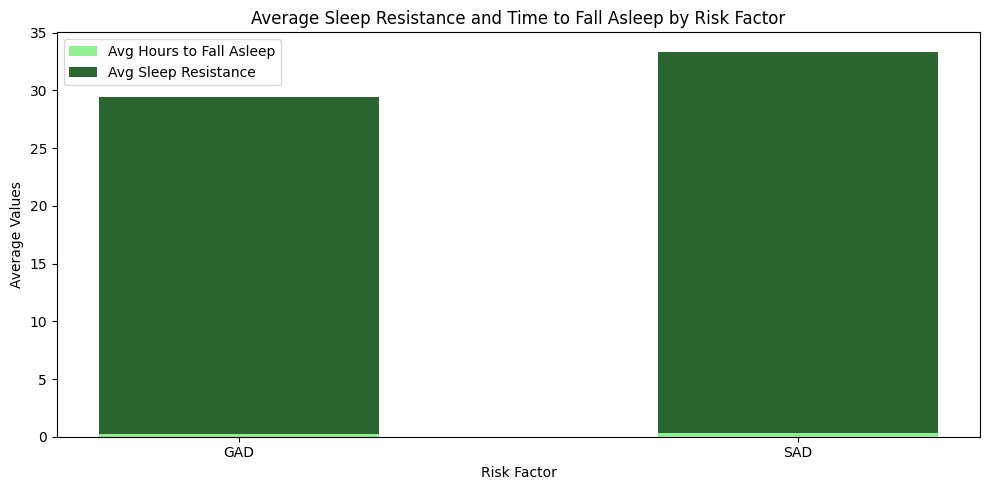

In [16]:
import numpy as np
import matplotlib.pyplot as plt

risk_factors = []
avg_hours_to_fall_asleep = []
avg_sleep_resistance = []

for row in results:
    risk_factor = str(row.riskFactorName)
    if risk_factor == 'SAD_%28Seasonal_Anxiety_Disorder%29':
        risk_factor = 'SAD'
    elif risk_factor == 'GAD_%28Generalized_Anxiety_Disorder%29':
        risk_factor = 'GAD'
    else:
        risk_factor = risk_factor.replace('_', ' ').title()

    risk_factors.append(risk_factor)
    avg_hours_to_fall_asleep.append(float(row.avgHoursToFallAsleep))
    avg_sleep_resistance.append(float(row.avgSleepResistance))


#scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(avg_hours_to_fall_asleep, avg_sleep_resistance, color="darkgreen")

for i, risk_factor in enumerate(risk_factors):
    plt.text(avg_hours_to_fall_asleep[i] + 0.02, avg_sleep_resistance[i], risk_factor, fontsize=9)

plt.xlabel('Average Hours to Fall Asleep')
plt.ylabel('Average Sleep Resistance')
plt.title('Sleep Resistance vs. Hours to Fall Asleep by Risk Factor')
plt.grid(True)
plt.tight_layout()
plt.savefig('query4_scatter.png')
plt.show()

#stacked bar
bar_width = 0.5
index = np.arange(len(risk_factors))

plt.figure(figsize=(10, 5))
plt.bar(index, avg_hours_to_fall_asleep, bar_width, label='Avg Hours to Fall Asleep', color="lightgreen")
plt.bar(index, avg_sleep_resistance, bar_width, bottom=avg_hours_to_fall_asleep, label='Avg Sleep Resistance', color="#2B652F")
plt.xlabel('Risk Factor')
plt.ylabel('Average Values')
plt.title('Average Sleep Resistance and Time to Fall Asleep by Risk Factor')
plt.xticks(index, risk_factors)
plt.legend()
plt.tight_layout()
plt.savefig('query4_stacked.png')
plt.show()


In [17]:
"""
Query5 retrieves all genetic factors (genes or alleles) that are expressed in 
Homo sapiens and are identified as markers for anxiety disorders.
"""

query5 = """
PREFIX anx: <http://AnxietyDisordersandRiskFactors.com#>

SELECT (STRAFTER(STR(?geneticFactor), "#") AS ?geneticFactorName)
WHERE {
  {
    ?geneticFactor anx:expressedIn anx:Homo_sapiens ;
                    anx:is_marker_via_orthology anx:anxiety_disorder .
  }
  UNION
  {
    ?geneticFactor anx:expressedIn anx:Homo_sapiens ;
                    anx:is_implicated_in anx:anxiety_disorder .
  }
}
"""

results = anx_graph.query(query5)

for row in results:
    print(f"Gene / Allele: {row.geneticFactorName}")
    
#All of them are genes actually    


Gene / Allele: ARC
Gene / Allele: BDNF
Gene / Allele: CREB1
Gene / Allele: DNMT3B
Gene / Allele: ELK1
Gene / Allele: GAD1
Gene / Allele: HDAC2
Gene / Allele: HTR1A
Gene / Allele: L1CAM
Gene / Allele: MC4R
Gene / Allele: NTRK2
Gene / Allele: POMC
Gene / Allele: CTNND2
Gene / Allele: DRD2
Gene / Allele: FNTB
Gene / Allele: GAD1
Gene / Allele: GDNF
Gene / Allele: HTR1A
Gene / Allele: MANEA
Gene / Allele: NPY
Gene / Allele: SLC6A4


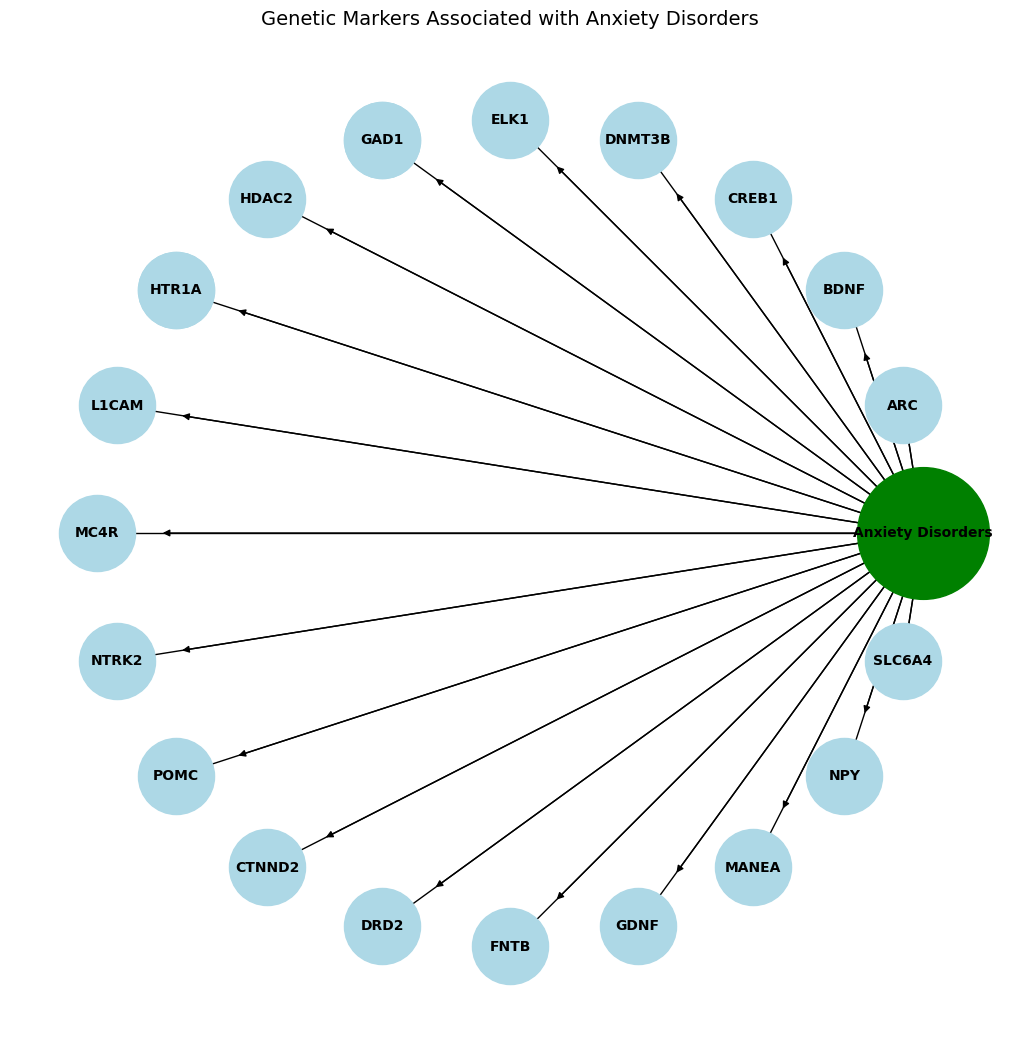

In [18]:
genes = []
counts = []

for row in results:
    genes.append(str(row.geneticFactorName))

unique_genes = list(set(genes))
gene_counts = [genes.count(gene) for gene in unique_genes]

G = nx.DiGraph()
central_node = 'Anxiety Disorders'

for gene in genes:
    G.add_edge(central_node, gene)

pos = nx.circular_layout(G)

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, nodelist=genes, node_size=3000, node_color="lightblue", font_size=10, font_weight='bold', arrows=False)
nx.draw(G, pos, nodelist=[central_node], node_size=9000, node_color="green")
plt.title("Genetic Markers Associated with Anxiety Disorders", fontsize=14)

plt.savefig('query5.png')
plt.show()
